In [85]:
%reset
import numpy as np
import pandas as pd
from keras.models import load_model
from keract import get_activations
import cv2
import os
from random import shuffle
import keract

import matplotlib.pyplot as plt


# from matplotlib import pyplot
##inter pooling

def normfunction(featuremap,k,normvalue):
    featuremap_sorted =  sorted(featuremap,reverse = True)
    featuremap_pooled = featuremap_sorted[:k]
    featuremap_pooled = np.array(featuremap_pooled)

    featuremap_score = (sum((featuremap_pooled) ** normvalue)/k) ** (1. / normvalue)
    
    return featuremap_score
def feature_map_scoring(featuremap,k1,normvalue):
    featuremap = np.array(featuremap)
    featuremap_flatten = featuremap.flatten()
    featuremap_score = normfunction(featuremap_flatten,k1,normvalue)
    return featuremap_score

def feature_map_pooling(featuremaps,k1,normvalue):
    intra_patch_pooling = []
    for i in range(len(featuremaps[0][0][0])):
#         print(len(featuremaps[0][0][0]))
        featuremap_score = feature_map_scoring(featuremaps[:,:,:,i],k1,normvalue)
        
        intra_patch_pooling.append(featuremap_score)
    return intra_patch_pooling

def reading_model(input_model):
    model = load_model(input_model)
    return model
def extracting_feature_maps(model,inputimage,layer_number):
    img_n = cv2.imread(inputimage,0)
    img = np.expand_dims(img_n,axis = 2)
    img = np.expand_dims(img,axis = 0)

    feature_maps = get_activations(model, img)
  
    key_dict = []
    key_dict.extend(feature_maps.keys())
    #keract.display_activations(feature_maps)
    featuremaps = feature_maps[key_dict[layer_number]]
    
    return featuremaps


def patch_pooling(pooled_patchs,k2,normvalue):
    pooled_patchs = np.array(pooled_patchs)
    patch_pooling = []
    for i in range(len(pooled_patchs[0])):
#         print(len(pooled_patchs[0]))
        if len(pooled_patchs[0])<k2:
            pooled_patch_column = pooled_patchs[:,i]
            pooled_patch_score = normfunction(pooled_patch_column,len(pooled_patchs[0]),normvalue)
            patch_pooling.append(pooled_patch_score)
        else:
            pooled_patch_column = pooled_patchs[:,i]
            pooled_patch_score = normfunction(pooled_patch_column,k2,normvalue)
            patch_pooling.append(pooled_patch_score)
    return patch_pooling

def image_data(patient_id,N,k1,k2,model):
    '''Input
    N: Number of patches
    '''
    
    total_patches = os.listdir(patient_id)
    #N = len(patient_id)

    shuffle(total_patches)
    
    pooled_patchs = []
    input_image = []
    for i in range(N):
        try:
            
            #print(str("%s/%s"%(patient_id,total_patches[i])))
            inputimage = str("%s/%s"%(patient_id,total_patches[i]))
            #plt.imshow(cv2.imread(inputimage))
            featuremaps =  extracting_feature_maps(model,inputimage,9)
            
            feature_map_score = feature_map_pooling(featuremaps,k1,3)
            #print(np.argmax(feature_map_score))
            pooled_patchs.append(feature_map_score)
            input_image.append("%s/%s"%(patient_id,total_patches[i]))
        except:
            print(inputimage)
#             print(e)
    image_pooling = patch_pooling(pooled_patchs,k2,3)
    important_feature_map = np.argmax(image_pooling)
    return image_pooling,pooled_patchs,important_feature_map,input_image
#     return image_pooling
if __name__ == '__main__':
    
    model = reading_model('model_interpretation.h5')
    image_pooling,pooled_patchs,important_feature_map,input_image = image_data('TCGA-08-0344-01',10,540,100,model)
# TCGA-12-0657-01(survival month 0.10)    
#     split_index = pd.read_csv("BCB_SPLIT_fold1_newsplit1.csv")
#     train_index = split_index[split_index.Data_usage_type.isin(['Validation'])].Patient_ID.values
    #print(train_index)
#     model = reading_model("C:/Users/skosara1/OneDrive - Kennesaw State University/ACMBCB/TSNET3.h5")
#     image_train_id = os.listdir("C:/Users/skosara1/OneDrive - Kennesaw State University/ACMBCB/Split6")
#     train_id = []
#     train_index_t = []
#     x = len(image_train_id)
#     print(len(image_train_id))
    
#     for g in range(0,x):
        
#         #len(image_train_id)

# #         if image_train_id[g][:15] in train_index:
#         try:
        
#             print(g)
#             print(image_train_id[g])
#             if len(os.listdir("C:/Users/skosara1/OneDrive - Kennesaw State University/ACMBCB/Split6/%s"%image_train_id[g]))>35:
#                 print(len(os.listdir("C:/Users/skosara1/OneDrive - Kennesaw State University/ACMBCB/Split6/%s"%image_train_id[g])))

#                 train_ID = image_data("C:/Users/skosara1/OneDrive - Kennesaw State University/ACMBCB/Split6/%s"%image_train_id[g],35,240,20,model)
#                 print("large")
#             else:
#                 print(len(os.listdir("C:/Users/skosara1/OneDrive - Kennesaw State University/ACMBCB/Split6/%s" % image_train_id[g])))
#                 train_ID = image_data("C:/Users/skosara1/OneDrive - Kennesaw State University/ACMBCB/Split6/%s" % image_train_id[g],len(os.listdir("C:/Users/skosara1/OneDrive - Kennesaw State University/ACMBCB/Split6/%s"%image_train_id[g])) ,240, 100,model)

#                 print("small")
#         except:
#             train_ID = []
#             print(w)
#             print("Split7/%s"%image_train_id[g])
#             for i in range(50):
#                 train_ID.append(0)

               
#         print(train_ID)
#         train_ID.append(image_train_id[g])
#         train_index_T = image_train_id[g]
#         train_index_t.append(train_index_T)

#         train_id.append(train_ID)
#     train_index_tdf = pd.DataFrame(train_index_t)
#     train_index_tdf.to_csv('fold11/Trainnew3.csv')
#     train_iddf = pd.DataFrame(train_id)
#     train_iddf.to_csv('fold11/Trainnewindex3.csv')

                         
                         

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# find out best feature map

In [86]:
image_pooling
important_feature_map

22

In [87]:
image_pooling
y = np.argsort(image_pooling)
y

array([48, 36, 34, 19, 25, 33, 16, 13, 27, 10,  8, 43, 41,  1, 30, 28, 17,
        5,  2, 15, 45, 24, 49, 38, 29, 32,  9, 47, 18, 11, 39, 26, 37, 44,
        3, 20, 23, 46, 35,  4, 12, 40,  0,  7, 42, 21, 14,  6, 31, 22],
      dtype=int64)

# find out best feature map

In [89]:
High_patch = []
for i in range(len(pooled_patchs)):
    High_patch.append((pooled_patchs[i][important_feature_map],input_image[i]))
X_list= sorted(High_patch,reverse=True)
X_list

[(832.7366038849742, 'TCGA-08-0344-01/3321.png'),
 (812.243921005012, 'TCGA-08-0344-01/9460.png'),
 (804.4292084875108, 'TCGA-08-0344-01/3451.png'),
 (792.2839333517576, 'TCGA-08-0344-01/2988.png'),
 (786.4035371760596, 'TCGA-08-0344-01/6483.png'),
 (772.7184739623782, 'TCGA-08-0344-01/9984.png'),
 (746.5549893650337, 'TCGA-08-0344-01/3553.png'),
 (703.9778375012216, 'TCGA-08-0344-01/8101.png'),
 (557.2860275459008, 'TCGA-08-0344-01/11709.png'),
 (539.0511510999521, 'TCGA-08-0344-01/10157.png')]

In [90]:
# X_list= sorted(High_patch,reverse=True)
# X_list[-7]

In [91]:
import numpy as np
import pandas as pd
from keras.models import load_model
from keract import get_activations
import cv2
import os
from random import shuffle
import keract

import matplotlib.pyplot as plt

def extracting_feature_maps(model,inputimage,layer_number):
    img_n = cv2.imread(inputimage,0)
    img = np.expand_dims(img_n,axis = 2)
    img = np.expand_dims(img,axis = 0)

    feature_maps = get_activations(model, img)
  
    key_dict = []
    key_dict.extend(feature_maps.keys())
    #print(key_dict[9])
    keract.display_activations(feature_maps)
    featuremaps = feature_maps[key_dict[layer_number]]
    
    return featuremaps
def reading_model(input_model):
    model = load_model(input_model)
    return model

# This for PPT OF FEATUREMAP

input_1_6:0 (256, 256, 1) -> Skipped. First dimension is not 1.
conv2d_1_6/Relu:0 (1, 248, 248, 50) 


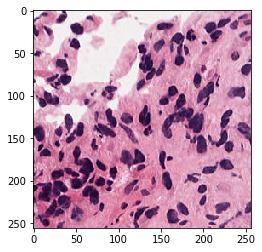

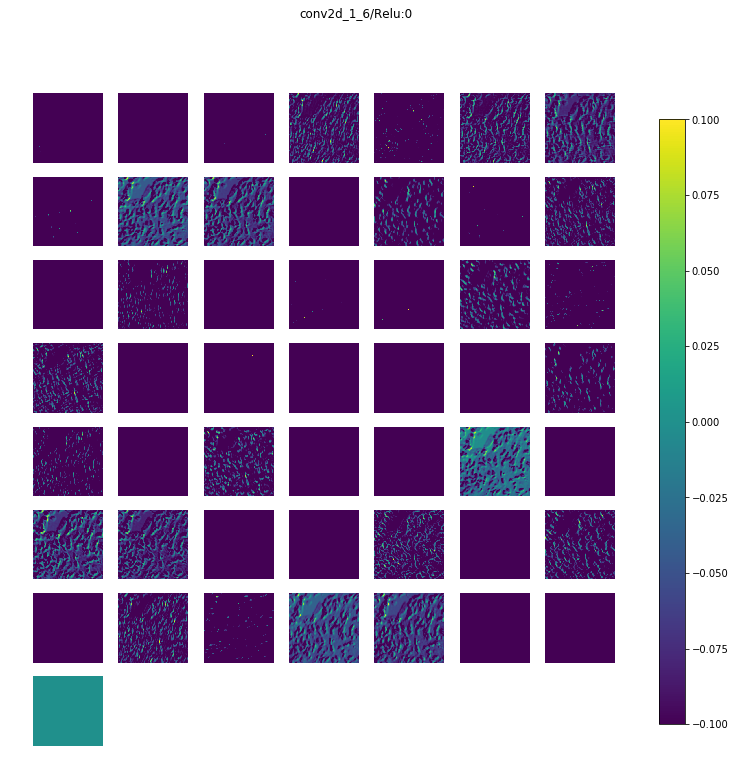

spatial_dropout2d_1_6/cond/Merge:0 (1, 248, 248, 50) 


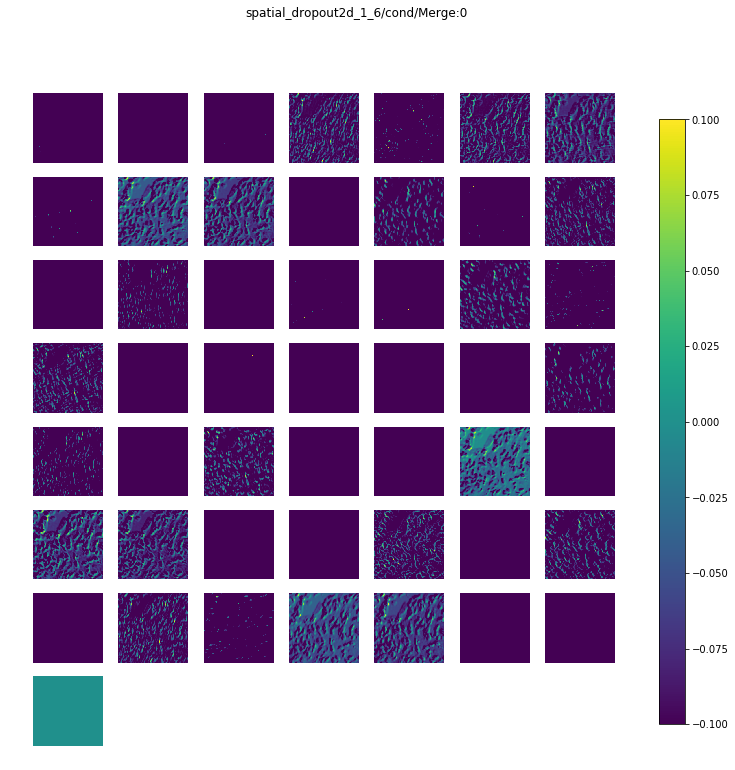

conv2d_2_6/Relu:0 (1, 240, 240, 50) 


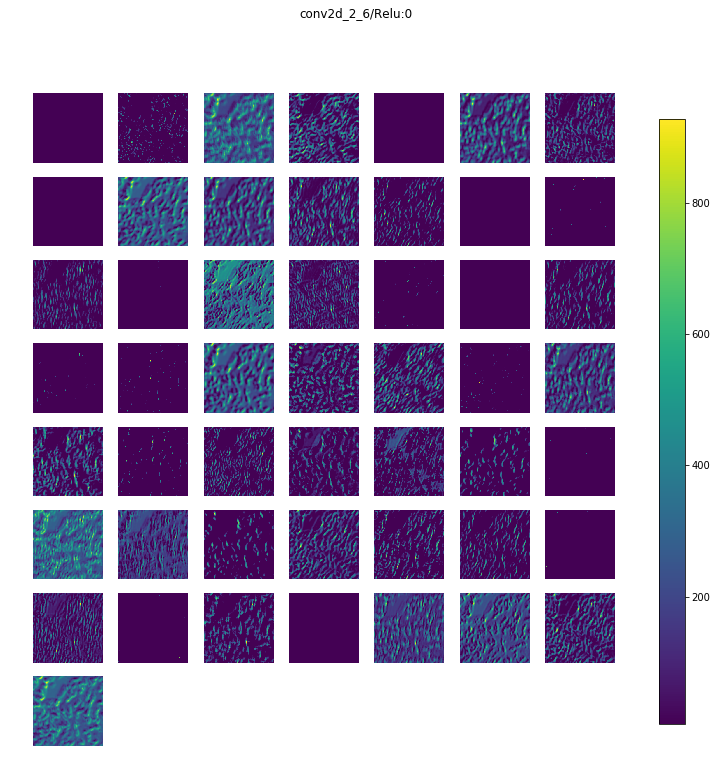

max_pooling2d_1_6/MaxPool:0 (1, 120, 120, 50) 


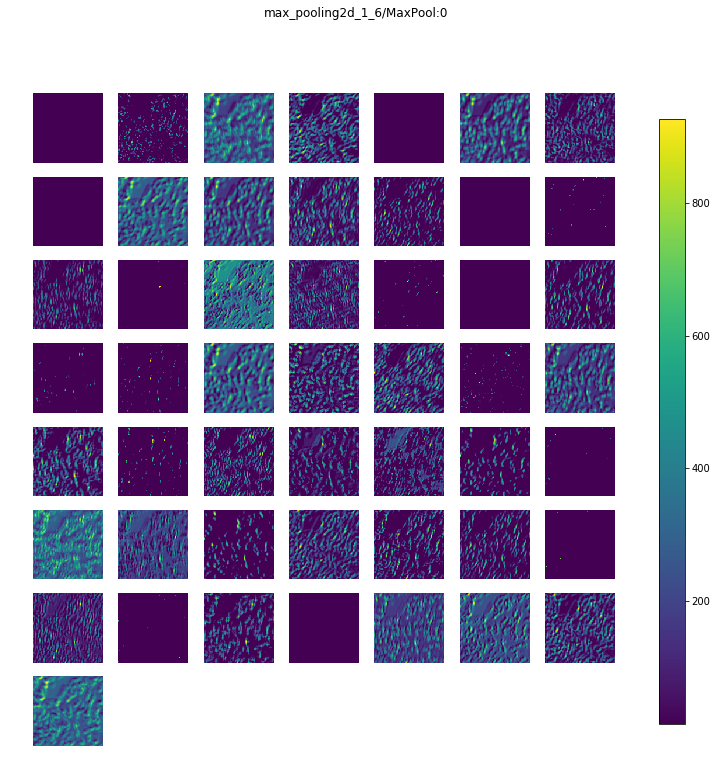

conv2d_3_6/Relu:0 (1, 112, 112, 50) 


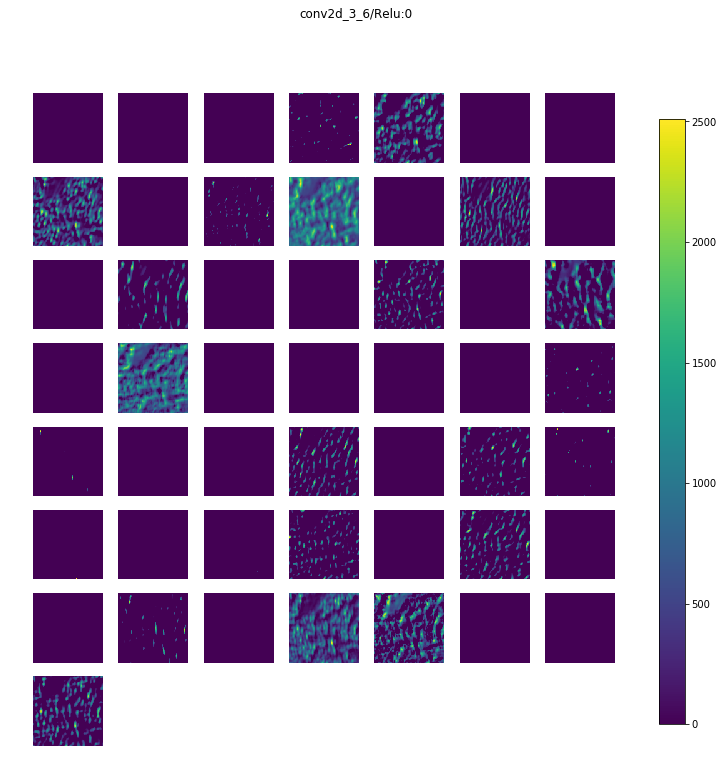

spatial_dropout2d_2_6/cond/Merge:0 (1, 112, 112, 50) 


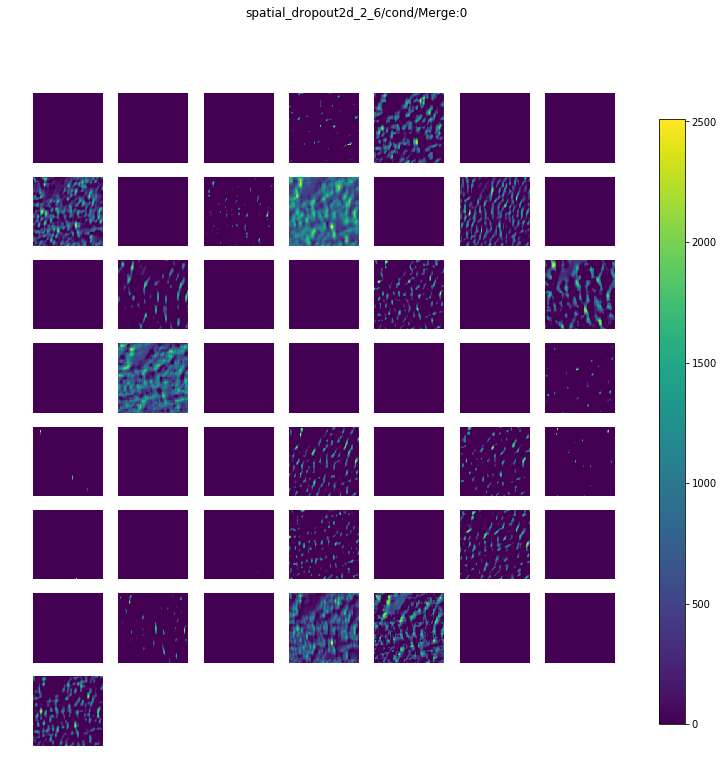

conv2d_4_6/Relu:0 (1, 104, 104, 50) 


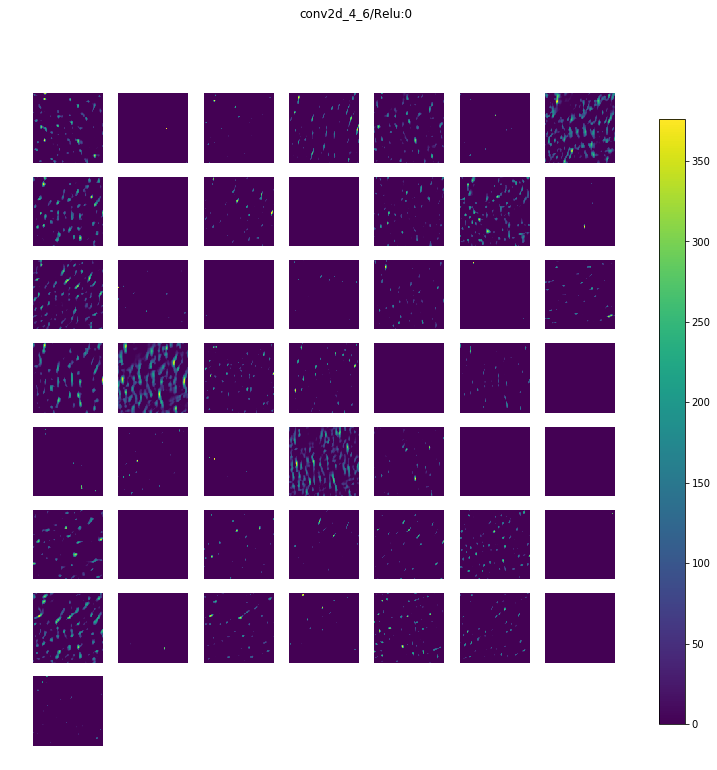

max_pooling2d_2_6/MaxPool:0 (1, 52, 52, 50) 


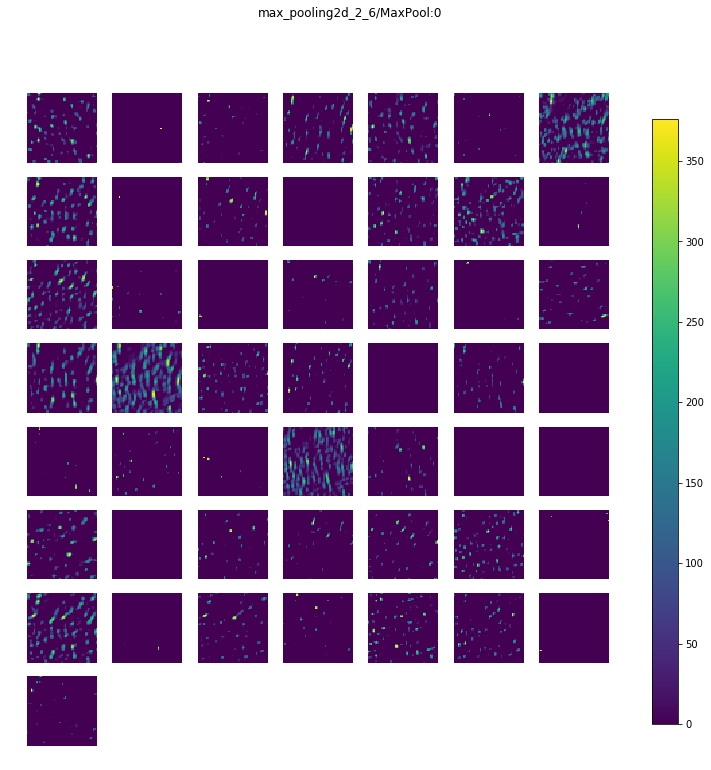

spatial_dropout2d_3_6/cond/Merge:0 (1, 52, 52, 50) 


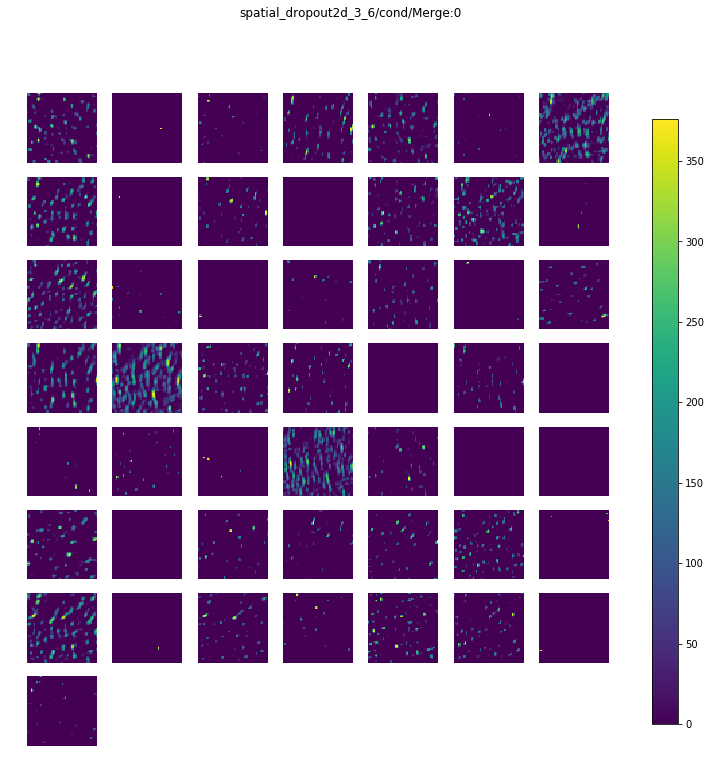

flatten_1_6/Reshape:0 (1, 135200) -> Skipped. 2D Activations.
dense_1_6/Relu:0 (1, 30) -> Skipped. 2D Activations.
dense_2_6/BiasAdd:0 (1, 1) -> Skipped. 2D Activations.
input_1_6:0 (256, 256, 1) -> Skipped. First dimension is not 1.
conv2d_1_6/Relu:0 (1, 248, 248, 50) 


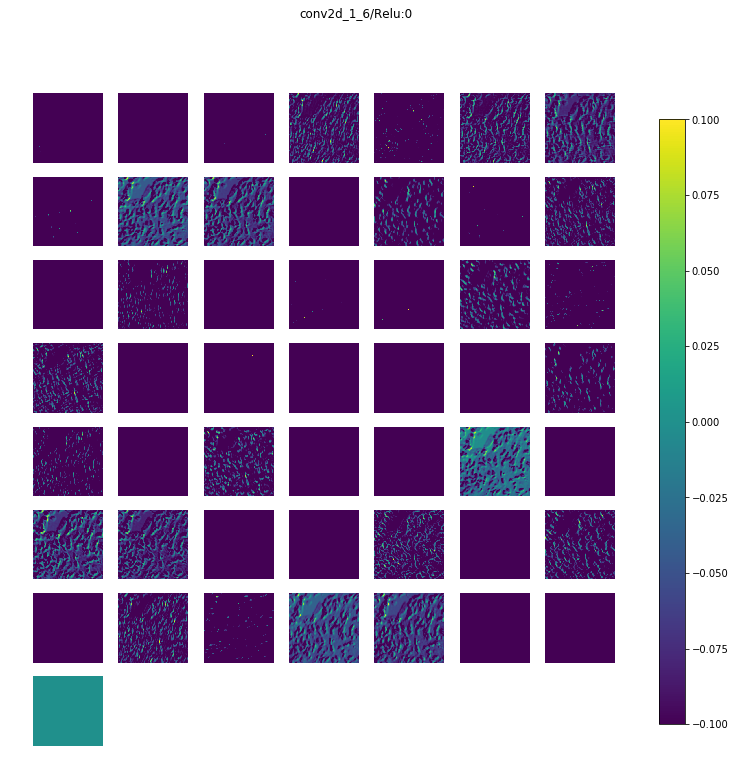

spatial_dropout2d_1_6/cond/Merge:0 (1, 248, 248, 50) 


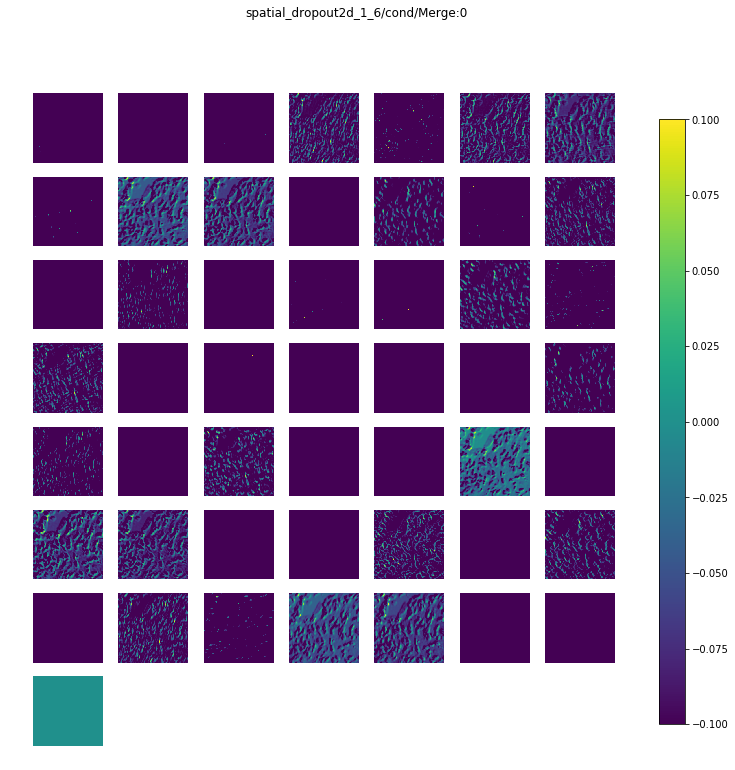

conv2d_2_6/Relu:0 (1, 240, 240, 50) 


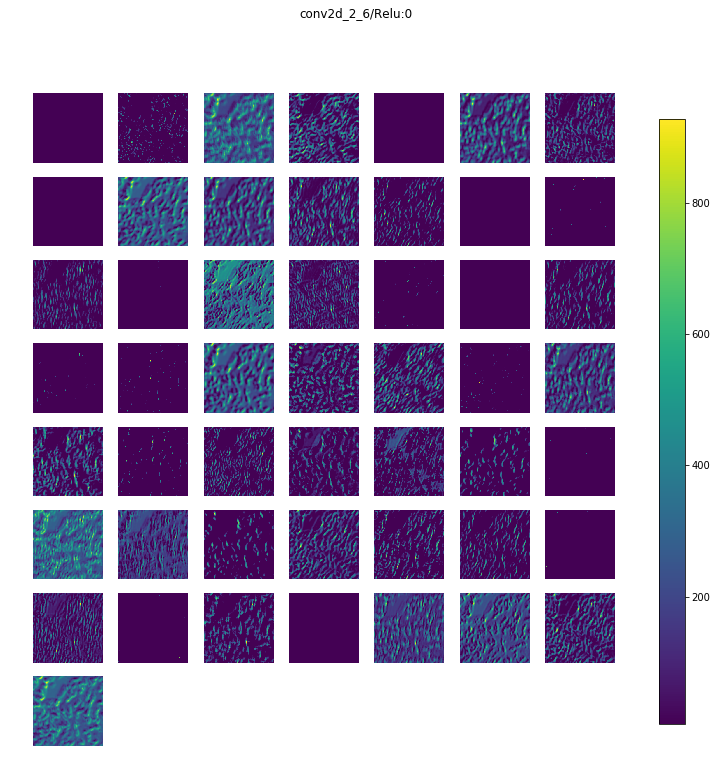

max_pooling2d_1_6/MaxPool:0 (1, 120, 120, 50) 


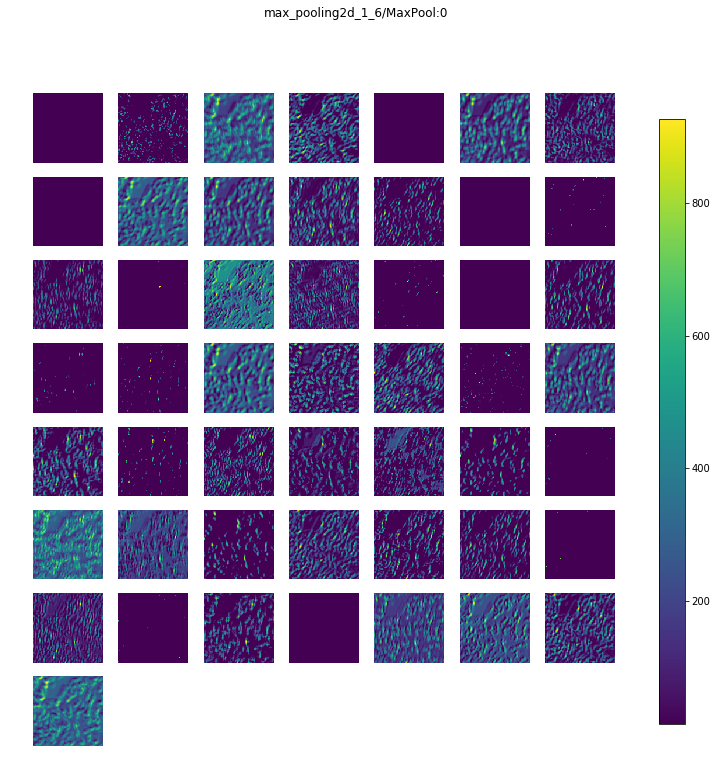

conv2d_3_6/Relu:0 (1, 112, 112, 50) 


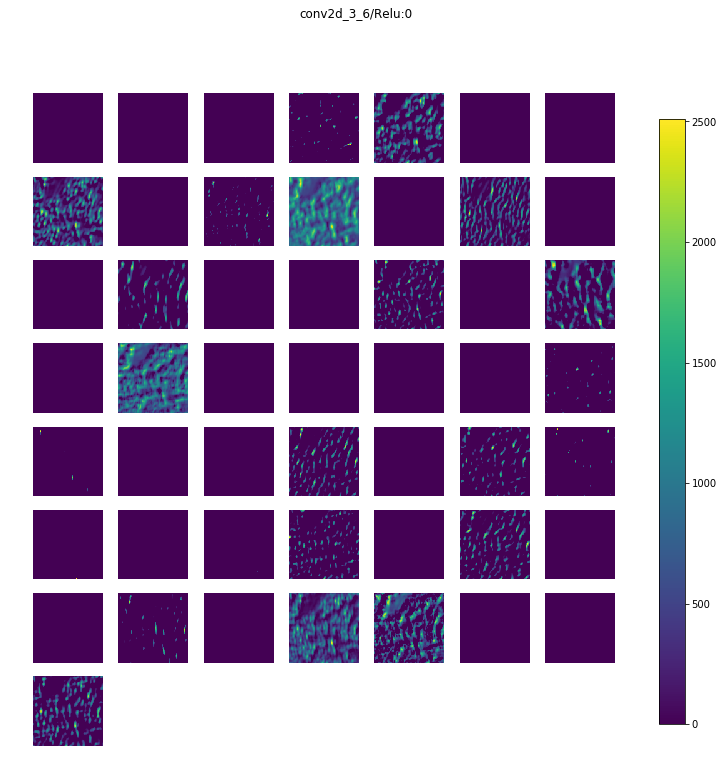

spatial_dropout2d_2_6/cond/Merge:0 (1, 112, 112, 50) 


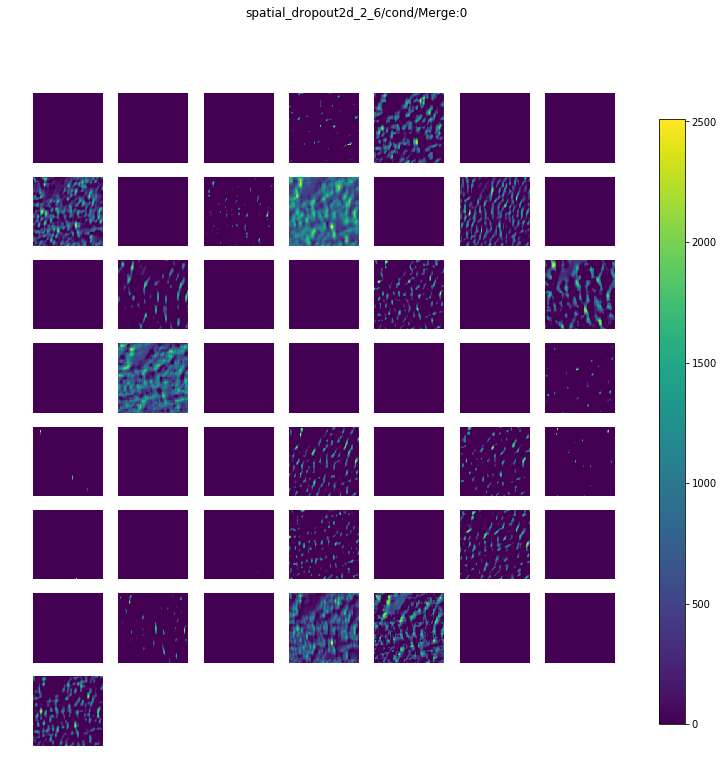

conv2d_4_6/Relu:0 (1, 104, 104, 50) 


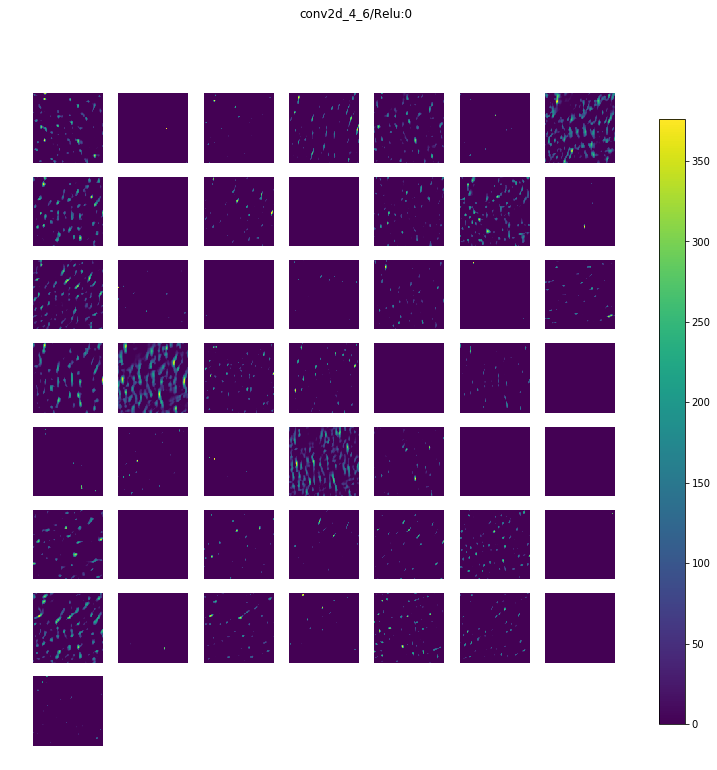

max_pooling2d_2_6/MaxPool:0 (1, 52, 52, 50) 


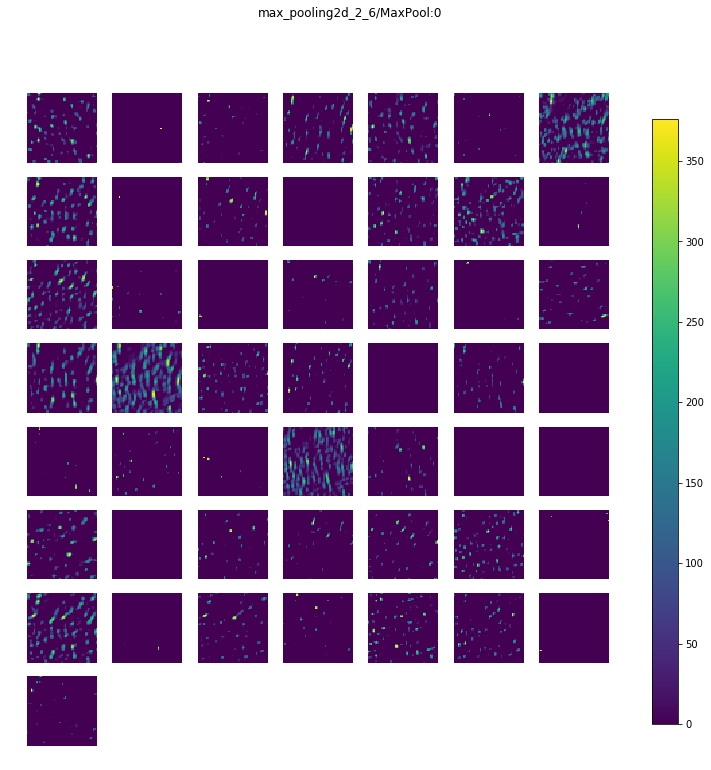

spatial_dropout2d_3_6/cond/Merge:0 (1, 52, 52, 50) 


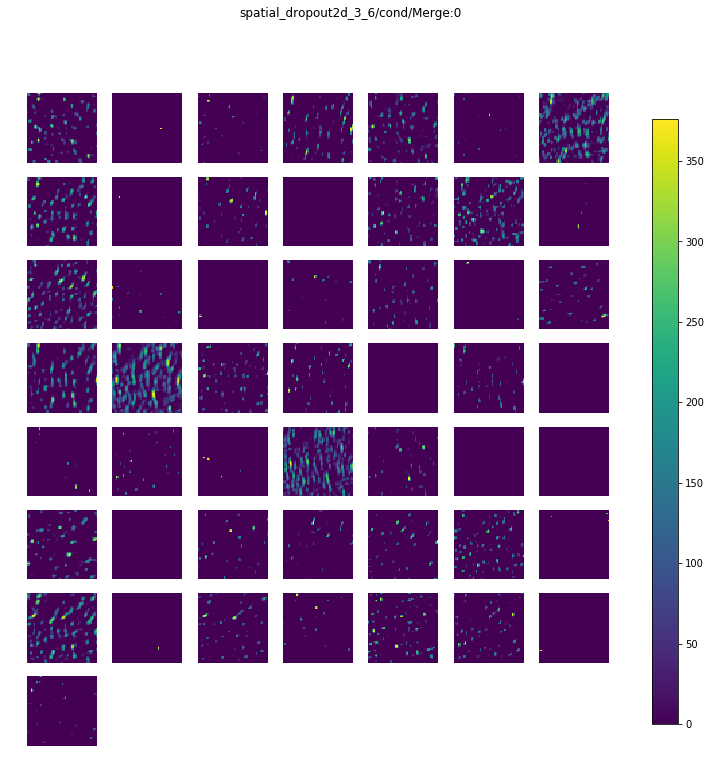

flatten_1_6/Reshape:0 (1, 135200) -> Skipped. 2D Activations.
dense_1_6/Relu:0 (1, 30) -> Skipped. 2D Activations.
dense_2_6/BiasAdd:0 (1, 1) -> Skipped. 2D Activations.
input_1_6:0 (256, 256, 1) -> Skipped. First dimension is not 1.
conv2d_1_6/Relu:0 (1, 248, 248, 50) 


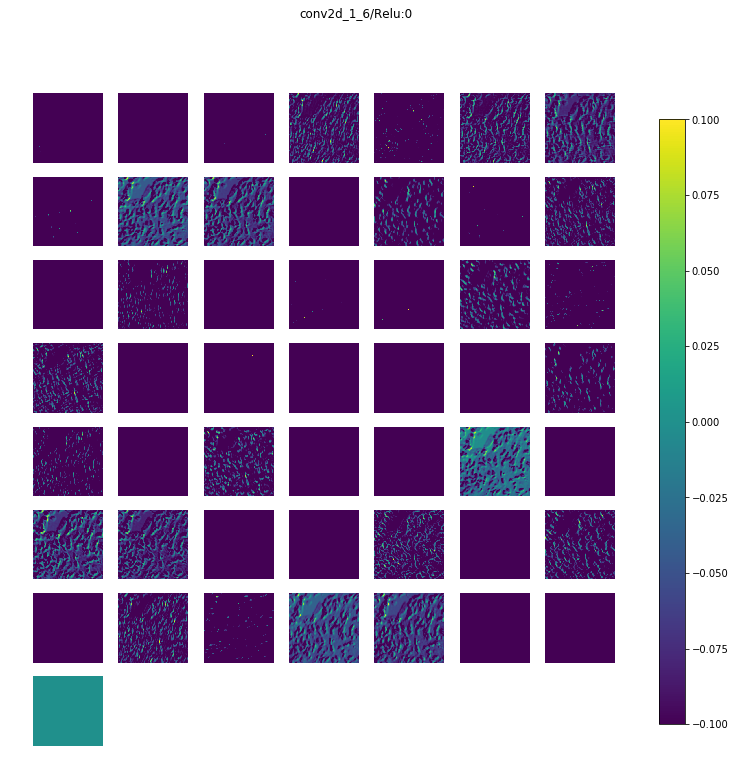

spatial_dropout2d_1_6/cond/Merge:0 (1, 248, 248, 50) 


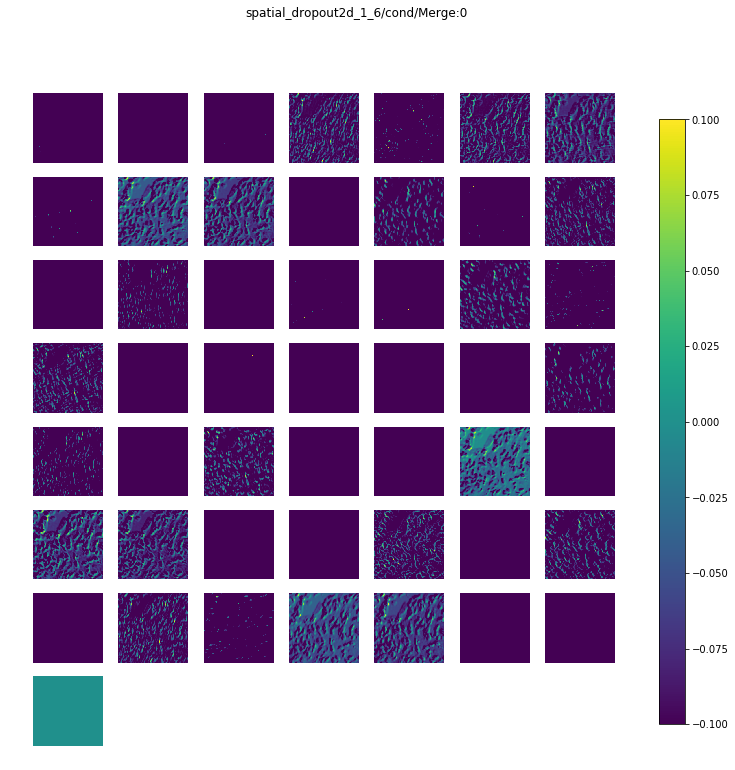

conv2d_2_6/Relu:0 (1, 240, 240, 50) 


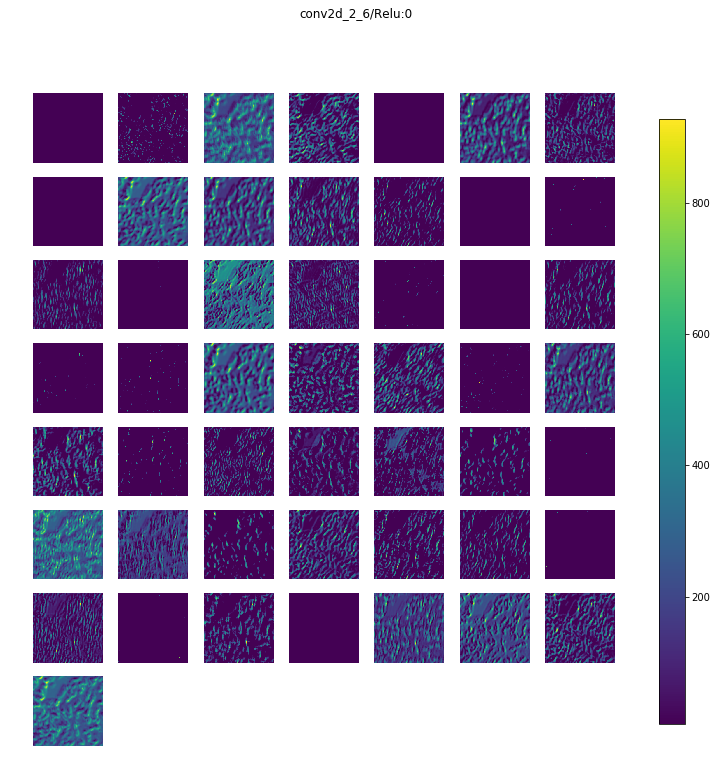

max_pooling2d_1_6/MaxPool:0 (1, 120, 120, 50) 


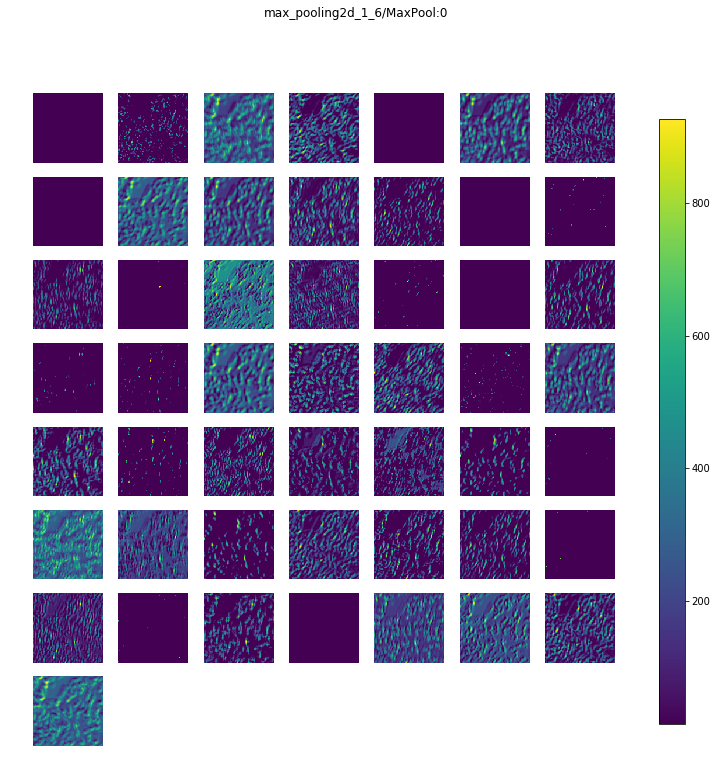

conv2d_3_6/Relu:0 (1, 112, 112, 50) 


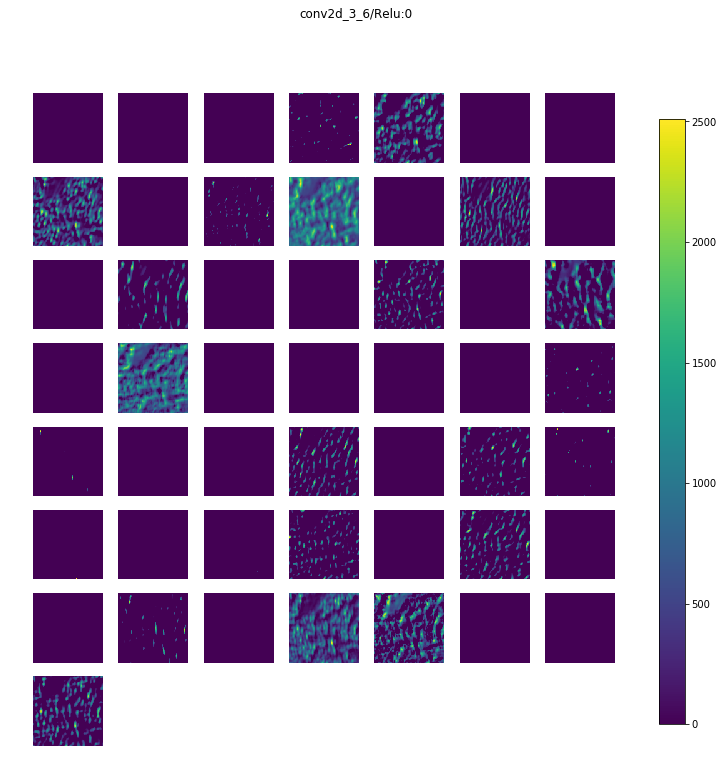

spatial_dropout2d_2_6/cond/Merge:0 (1, 112, 112, 50) 


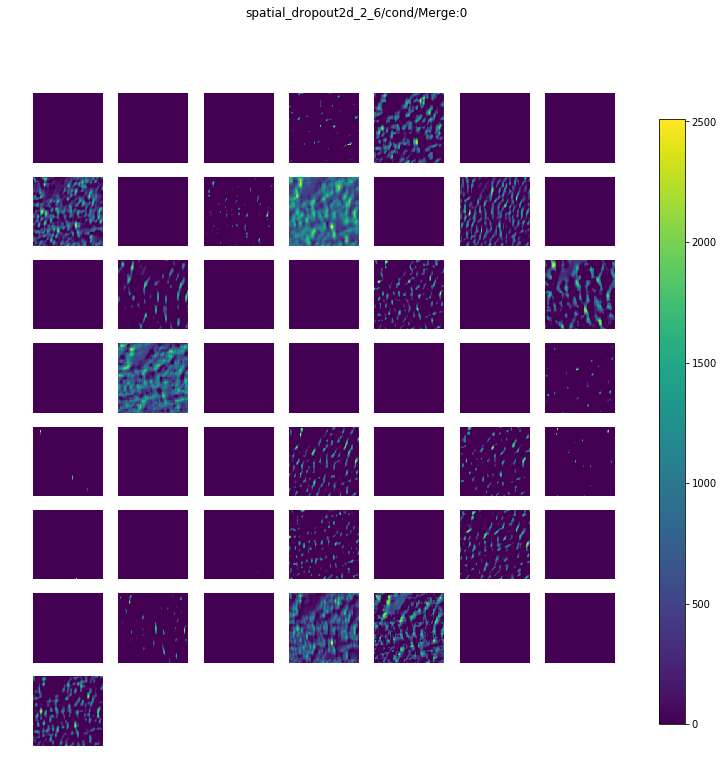

conv2d_4_6/Relu:0 (1, 104, 104, 50) 


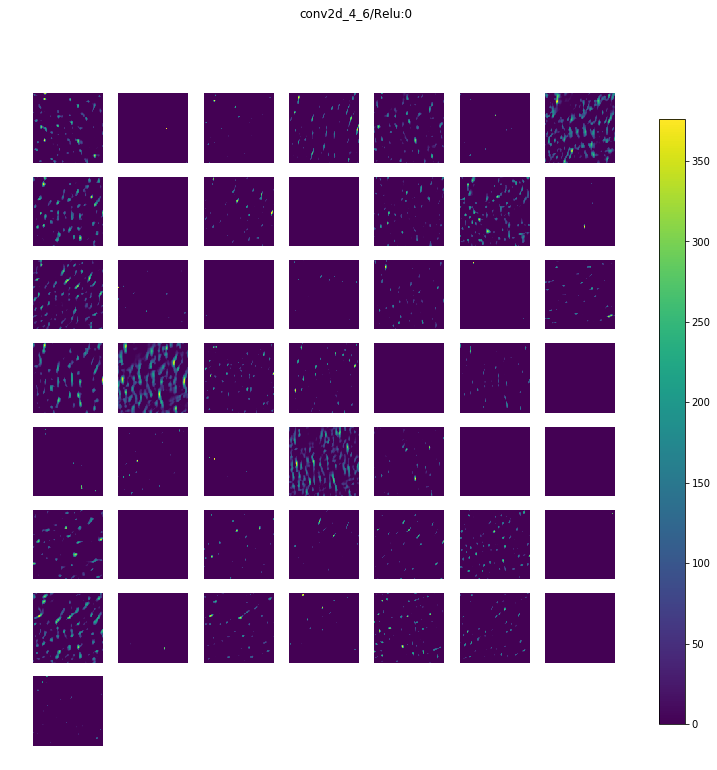

max_pooling2d_2_6/MaxPool:0 (1, 52, 52, 50) 


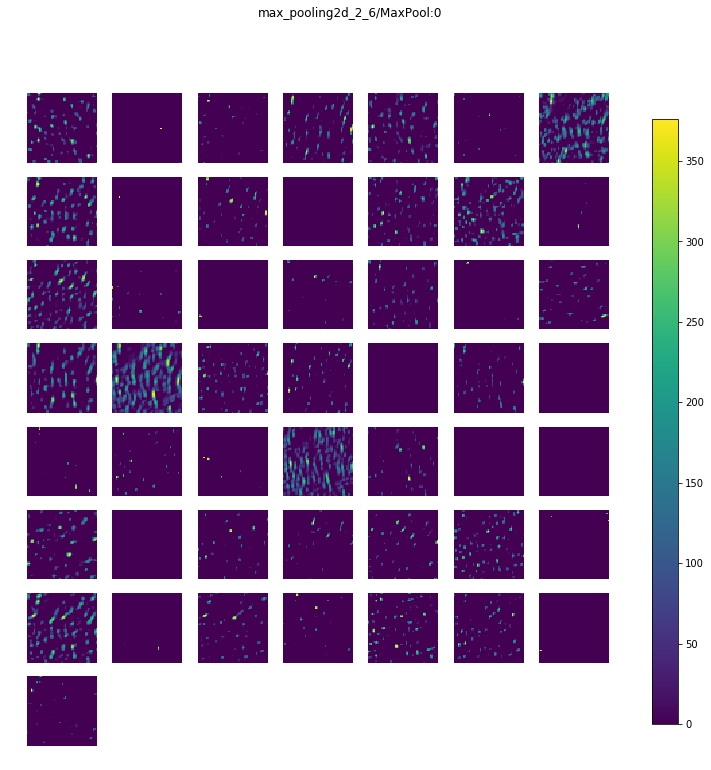

spatial_dropout2d_3_6/cond/Merge:0 (1, 52, 52, 50) 


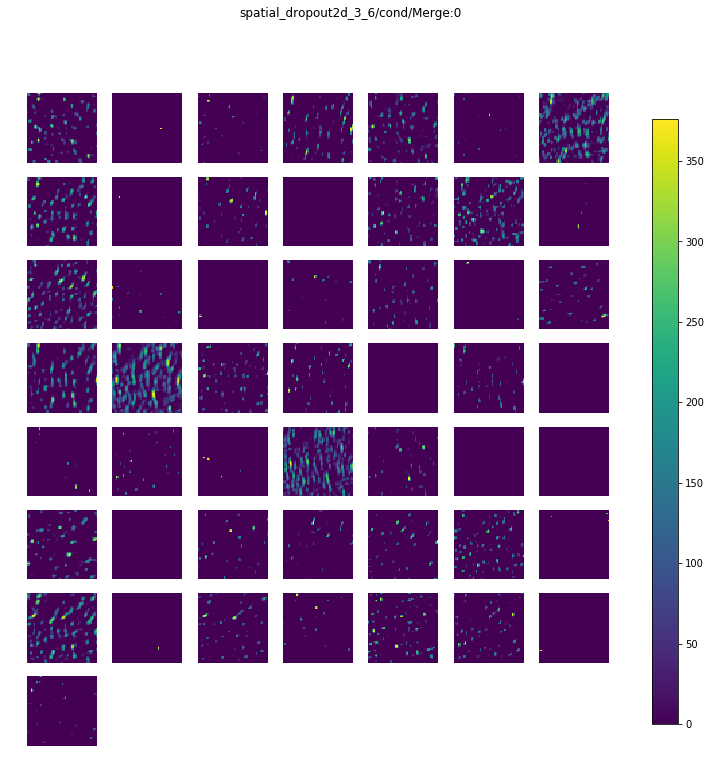

flatten_1_6/Reshape:0 (1, 135200) -> Skipped. 2D Activations.
dense_1_6/Relu:0 (1, 30) -> Skipped. 2D Activations.
dense_2_6/BiasAdd:0 (1, 1) -> Skipped. 2D Activations.


In [125]:
# model =  reading_model(r"C:\Users\skosara1\pythoncodes\model_interpretation\model_interpretation.h5")
inputimage = r'C:\Users\kangm\Dropbox\Research Projects Datax\ACM BCB 2019\Results\Model_Interpertation\TCGA-08-0344-01 (survival month 115.77)\3.png'

img_n1 = cv2.cvtColor(cv2.imread(inputimage),cv2.COLOR_BGR2RGB)
plt.imshow(img_n1)
featuremapfirst = extracting_feature_maps(model,inputimage,3)
featuremaps =  extracting_feature_maps(model,inputimage,5)
featuremapslast = extracting_feature_maps(model,inputimage,9)


# Paper visualizations first image

In [126]:
##first level
background = cv2.imread(r"C:\Users\kangm\Dropbox\Research Projects Datax\ACM BCB 2019\Results\Model_Interpertation\TCGA-08-0344-01 (survival month 115.77)\3.png")
backgound = background[0:248,0:248]
featuremap_f = []

for i in range(len(featuremapfirst[:,:,:,9][0])):
    featuremap1_f = []
    for j in range(len(featuremapfirst[:,:,:,9][0][0])):
        if featuremapfirst[:,:,:,9][0][i][j] > 800:
            featuremap1_f.append([0,0,255])
        else:
            featuremap1_f.append([0,0,0])
    featuremap_f.append(featuremap1_f)
print(featuremapfirst[:,:,:,9].max())
cv2.imwrite("tempfirst.png",np.array(featuremap_f))

featuremap_fi = cv2.imread("tempfirst.png",0)
featuremap_fi = cv2.resize(featuremap_fi,(248,248))
featuremap_first = []
for k in range(len(featuremap_fi)):
    featuremap_first1 = []
    for t in range(len(featuremap_fi[0])):
        if featuremap_fi[k][t] > 0:
            featuremap_first1.append([0,0,255])
        else:
            featuremap_first1.append([0,0,0])
    featuremap_first.append(featuremap_first1)
            
newimage = np.array(featuremap_first)+backgound
# print(featuremap.mean())
cv2.imwrite("new_image_extraction_l.png",newimage)
# background = cv2.imread(r"C:\Users\kangm\Dropbox\Research Projects Datax\ACM BCB 2019\Results\Model_Interpertation\TCGA-06-0402-01(survival month 0.53)\1.png")
# backgound = background[0:248,0:248]
# overlay = cv2.imread("featuremap.png")
# print(len(overlay))
# added_image = cv2.addWeighted(overlay,0.3,backgound,0.7,0)
# cv2.imwrite('Combined.png',added_image)

2241.9172


True

# Paper visualizations second image

In [131]:
##intermediate level
background = cv2.imread(r"C:\Users\kangm\Dropbox\Research Projects Datax\ACM BCB 2019\Results\Model_Interpertation\TCGA-08-0344-01 (survival month 115.77)\3.png")
backgound = background[0:248,0:248]
featuremap = []

for i in range(len(featuremaps[:,:,:,10][0])):
    featuremap1 = []
    for j in range(len(featuremaps[:,:,:,10][0][0])):
        if featuremaps[:,:,:,10][0][i][j] > 700:
            featuremap1.append([0,0,1050])
        else:
            featuremap1.append([0,0,0])
    featuremap.append(featuremap1)
print(featuremaps[:,:,:,10].max())
cv2.imwrite("temp.png",np.array(featuremap))

featuremap = cv2.imread("temp.png",0)
featuremap = cv2.resize(featuremap,(248,248))
featuremap_inter = []
for k in range(len(featuremap)):
    featuremap_inter1 = []
    for t in range(len(featuremap[0])):
        if featuremap[k][t] > 0:
            featuremap_inter1.append([0,0,255])
        else:
            featuremap_inter1.append([0,0,0])
    featuremap_inter.append(featuremap_inter1)
            
newimage = np.array(featuremap_inter)+backgound
# print(featuremap.mean())
cv2.imwrite("new_image_extracted_intermediate_l.png",newimage)
# background = cv2.imread(r"C:\Users\kangm\Dropbox\Research Projects Datax\ACM BCB 2019\Results\Model_Interpertation\TCGA-06-0402-01(survival month 0.53)\1.png")
# backgound = background[0:248,0:248]
# overlay = cv2.imread("featuremap.png")
# print(len(overlay))
# added_image = cv2.addWeighted(overlay,0.3,backgound,0.7,0)
# cv2.imwrite('Combined.png',added_image)

1471.1625


True

# Paper visualizations  last image

In [130]:
##final level
background = cv2.imread(r"C:\Users\kangm\Dropbox\Research Projects Datax\ACM BCB 2019\Results\Model_Interpertation\TCGA-08-0344-01 (survival month 115.77)\3.png")
backgound = background[0:248,0:248]
featuremap_last = []

for i in range(len(featuremapslast[:,:,:,22][0])):
    featuremap1_last = []
    for j in range(len(featuremapslast[:,:,:,22][0][0])):
        if featuremapslast[:,:,:,22][0][i][j] > 1000:
            featuremap1_last.append([0,0,255])
        else:
            featuremap1_last.append([0,0,0])
    featuremap_last.append(featuremap1_last)
print(featuremapslast[:,:,:,22].max())
cv2.imwrite("templast.png",np.array(featuremap_last))

featuremap_l = cv2.imread("templast.png",0)
print(len(featuremap_l))
featuremap_l = cv2.resize(featuremap_l,(248,248))
featuremap_llayer = []
for k in range(len(featuremap_l)):
    featuremap_llayer1 = []
    for t in range(len(featuremap_l[0])):
        if featuremap_l[k][t] > 0:
            featuremap_llayer1.append([0,0,255])
        else:
            featuremap_llayer1.append([0,0,0])
    featuremap_llayer.append(featuremap_llayer1)
            
newimage = np.array(featuremap_llayer)+backgound
# print(featuremap.mean())
cv2.imwrite("new_image_last_extracted_l.png",newimage)
# background = cv2.imread(r"C:\Users\kangm\Dropbox\Research Projects Datax\ACM BCB 2019\Results\Model_Interpertation\TCGA-06-0402-01(survival month 0.53)\1.png")
# backgound = background[0:248,0:248]
# overlay = cv2.imread("featuremap.png")
# print(len(overlay))
# added_image = cv2.addWeighted(overlay,0.3,backgound,0.7,0)
# cv2.imwrite('Combined.png',added_image)

2375.1199
52


True

In [76]:
# featuremap = cv2.imread("temp.png",0)
# featuremap = cv2.resize(featuremap,(236,236))
# featuremap_inter = []
# for k in range(len(featuremap)):
#     featuremap_inter1 = []
#     for t in range(len(featuremap[0])):
#         if featuremap[k][t] > 0:
#             featuremap_inter1.append([0,0,255])
#         else:
#             featuremap_inter1.append([0,0,0])
#     featuremap_inter.append(featuremap_inter1)
            
# newimage = np.array(featuremap_inter)+backgound
# # print(featuremap.mean())
# cv2.imwrite("new_image_now.png",newimage)
# background = cv2.imread(r"C:\Users\kangm\Dropbox\Research Projects Datax\ACM BCB 2019\Results\Model_Interpertation\TCGA-06-0402-01(survival month 0.53)\1.png")
# backgound = background[0:236,0:236]
# overlay = cv2.imread("featuremap.png")
# print(len(overlay))
# added_image = cv2.addWeighted(overlay,0.3,backgound,0.7,0)
# cv2.imwrite('Combined.png',added_image)

ValueError: operands could not be broadcast together with shapes (236,236,3) (248,248,3) 

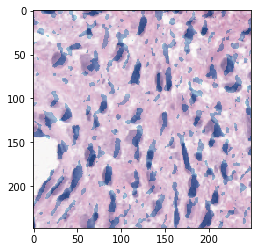

In [50]:
# plt.imshow(added_image)

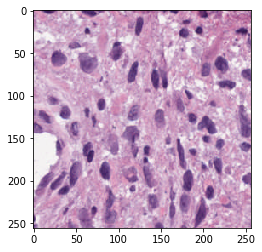

In [26]:
# plt.imshow(cv2.imread(inputimage))

In [82]:
# Y = []
# for y1 in reversed(y):
#     Y.append(y1)

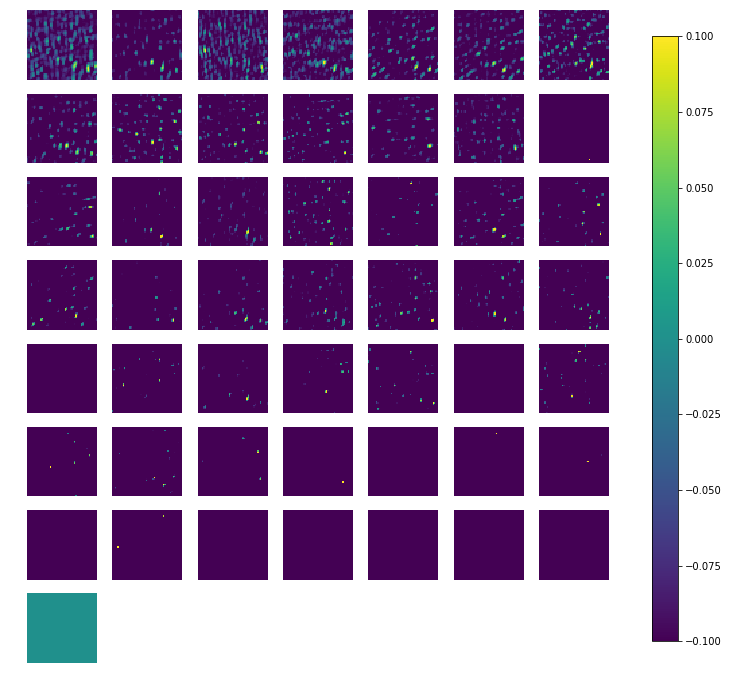

In [91]:
# # for j range(len(y)):
# fig, axes = plt.subplots(8, 7, squeeze=False, figsize=(12, 12))
# for i in range(56):

#         if i < featuremaps.shape[-1]:

#             img = featuremaps[0, :, :, Y[i]]

#             hmap = axes.flat[i].imshow(img)
#         axes.flat[i].axis('off')
    

# fig.subplots_adjust(right=0.8)

# cbar = fig.add_axes([0.85, 0.15, 0.03, 0.7])

# fig.colorbar(hmap, cax=cbar)


In [32]:
len(featuremaps[:,:,:,])

1

In [60]:
feature

22

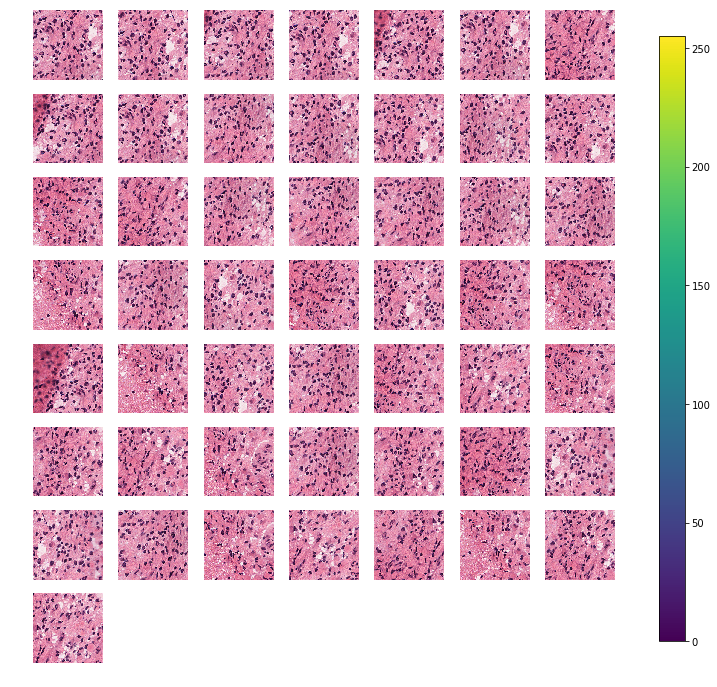

In [75]:
# for j range(len(y)):
fig, axes = plt.subplots(8, 7, squeeze=False, figsize=(12, 12))
for i in range(56):

        if i < 50:

            img = cv2.imread(X_list[i+250][1])

            hmap = axes.flat[i].imshow(img)
        axes.flat[i].axis('off')
    

fig.subplots_adjust(right=0.8)

cbar = fig.add_axes([0.85, 0.15, 0.03, 0.7])

fig.colorbar(hmap, cax=cbar)

In [25]:
featuremaps

array([[235],
       [235],
       [235],
       [236],
       [237],
       [238],
       [240],
       [241],
       [241],
       [238],
       [239],
       [240],
       [241],
       [241],
       [241],
       [240],
       [240],
       [239],
       [240],
       [240],
       [238],
       [239],
       [242],
       [242],
       [238],
       [227],
       [193],
       [166],
       [154],
       [141],
       [138],
       [146],
       [150],
       [107],
       [ 80],
       [ 60],
       [ 40],
       [ 29],
       [ 29],
       [ 26],
       [ 27],
       [ 36],
       [ 59],
       [122],
       [180],
       [180],
       [170],
       [169],
       [172],
       [190],
       [170],
       [141],
       [104],
       [ 57],
       [ 23],
       [ 18],
       [ 22],
       [ 19],
       [ 30],
       [ 28],
       [ 33],
       [ 48],
       [ 43],
       [ 41],
       [ 62],
       [ 83],
       [ 81],
       [ 74],
       [ 72],
       [ 92],
       [112],
      

In [76]:
i = 1
for j in range(250,len(X_list)):
    if i < 51:
    
        img = cv2.imread(X_list[j][1],0)
        img_n = cv2.imread(X_list[j][1])
        img_n1 = cv2.cvtColor(img_n,cv2.COLOR_BGR2RGB)
        print(img.mean())
        if img.mean()>50:
            if img.mean()<180:
                cv2.imwrite(r'C:\Users\kangm\Dropbox\Research Projects Datax\ACM BCB 2019\Results\Model_Interpertation\TCGA-26-1439-01  (survival month 13.86)\%s.png'%i,img_n1)
                i = i+1
                print(i)

            

146.85659790039062
2
148.8865966796875
3
142.24452209472656
4
148.4962158203125
5
139.10220336914062
6
147.311279296875
7
136.28958129882812
8
140.43626403808594
9
147.94854736328125
10
144.10794067382812
11
146.36029052734375
12
148.64022827148438
13
147.40147399902344
14
148.9700927734375
15
136.58792114257812
16
137.83477783203125
17
146.49838256835938
18
142.89324951171875
19
142.69155883789062
20
145.66734313964844
21
143.22894287109375
22
146.54342651367188
23
143.91802978515625
24
152.04295349121094
25
134.95726013183594
26
149.5984344482422
27
138.09915161132812
28
140.32733154296875
29
126.32936096191406
30
147.97653198242188
31
148.82452392578125
32
143.5655975341797
33
141.75637817382812
34
150.88226318359375
35
143.17926025390625
36
145.6770477294922
37
145.25318908691406
38
146.48345947265625
39
143.61289978027344
40
144.88839721679688
41
128.35743713378906
42
154.0008544921875
43
154.05581665039062
44
142.39547729492188
45
145.36790466308594
46
151.30091857910156
47
136.6

In [27]:
image_pooling

[405.06907888210526,
 23.66143347408856,
 71.05382939812507,
 259.1595704692611,
 262.5214905776982,
 68.69361870257377,
 629.1825224291437,
 439.6241151678216,
 10.955610680425718,
 176.79737988803518,
 26.282999297663544,
 152.83890689419255,
 454.70963873533015,
 41.18314568559461,
 555.7650574701846,
 104.86280741497815,
 39.183097661489114,
 53.03341894783052,
 146.36581224773104,
 146.16056467921678,
 263.34242655791786,
 1004.7509868573026,
 1228.4519482878527,
 211.13662295075892,
 146.56235912751762,
 8.920394056706959,
 261.22819489740806,
 14.666466913418251,
 339.25859581203326,
 96.07965462629073,
 50.95780027877777,
 724.8687352045712,
 177.86173995061975,
 13.566264115795198,
 0.5238484530333732,
 284.56853031814757,
 1.0314068210078926,
 204.60377307984905,
 106.23202151993068,
 206.59986832973422,
 314.7299465751873,
 21.625786619341678,
 488.0109403353556,
 80.74183840840276,
 204.3600866533889,
 87.62702355629325,
 304.8434100897702,
 143.77317393748078,
 6.728746755

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 248, 248, 50)      1300      
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 248, 248, 50)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 240, 240, 50)      62550     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 120, 50)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 50)      62550     
_________________________________________________________________
spatial_dropout2d_2 (Spatial (None, 112, 112, 50)      0         
__________

In [80]:
# 

W0804 16:23:41.133274 22804 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 248, 248, 50)      1300      
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 248, 248, 50)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 240, 240, 50)      62550     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 120, 50)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 50)      62550     
_________________________________________________________________
spatial_dropout2d_2 (Spatial (None, 112, 112, 50)      0         
__________